In [ ]:
pip install xgboost

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, anderson


#Grab data and put numerical vals in one table
#################################################################################################################
dataset_as_given = pd.read_csv(r"d:\Desktop\Practice Python\21.gym_members_exercise_tracking.csv")
#print(dataset_as_given)

# Get column names
column_names = dataset_as_given.columns
#print(column_names)

desired = ["Age", "Weight (kg)", "Height (m)", "Max_BPM", "Avg_BPM", "Resting_BPM", 
           "Session_Duration (hours)", "Calories_Burned", "Fat_Percentage", "Water_Intake (liters)", "Workout_Frequency (days/week)", "Experience_Level", "BMI"]

dataset_as_given_numeric = dataset_as_given[desired]



#Get Rid of Outliers
#################################################################################################################

# Copy the dataset so you keep the original intact
cleaned_df = dataset_as_given.copy()

# Select numeric columns
numeric_cols = cleaned_df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = cleaned_df[col].quantile(0.25)
    Q3 = cleaned_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]



print("Original rows:", dataset_as_given.shape[0])
print("Cleaned rows:", cleaned_df.shape[0])
print("Rows removed:", dataset_as_given.shape[0] - cleaned_df.shape[0])


#################################################################################################################

encoded_df = cleaned_df.copy()

encoded_df['Gender'] = encoded_df['Gender'].map({
    'Male': 1,
    'Female': 0
})

workout_dummies = pd.get_dummies(encoded_df['Workout_Type'], prefix='Workout', drop_first=True)
encoded_df = pd.concat([encoded_df.drop(columns=['Workout_Type']), workout_dummies], axis=1)


encoded_df.columns

Original rows: 973
Cleaned rows: 931
Rows removed: 42


Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Workout_HIIT', 'Workout_Strength', 'Workout_Yoga'],
      dtype='object')

In [18]:
# ============================================================
#   TRAIN/TEST SPLIT + SCALING
#   This prepares your data for any ML model
# ============================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ------------------------------------------------------------
# 1. Define X (features) and y (target)
# ------------------------------------------------------------
# Gender must already be encoded as 0/1 in encoded_df
X = encoded_df.drop(columns=['Gender'])
y = encoded_df['Gender']

# ------------------------------------------------------------
# 2. Train/Test Split
# ------------------------------------------------------------
# test_size=0.2 means 20% of data is held out for testing
# random_state=42 ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------------------------------------
# 3. Scale the numeric features
# ------------------------------------------------------------
# Scaling helps models like Logistic Regression, SVM, KNN, Neural Networks
# Tree-based models (Random Forest, XGBoost) do NOT require scaling,
# but scaling does not harm them.
scaler = StandardScaler()

# Fit on training data ONLY, then transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------------------------------------
# 4. Optional: Print shapes to confirm everything looks right
# ------------------------------------------------------------
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("\nScaled versions created: X_train_scaled, X_test_scaled")


X_train shape: (744, 16)
X_test shape: (187, 16)
y_train shape: (744,)
y_test shape: (187,)

Scaled versions created: X_train_scaled, X_test_scaled


Logistic Regression is a supervised machine learning algorithm used for classification problems. <br>
It predicts the the probability that an input belings to a specific class.<br>
In our case the classes would be male and female. <br>
Logistic Regression is used for binary classification (such as 0 or 1; True or False; Yes or No)<br><br>
Logistic Regression has 3 main types:<br>
1. Binomial Logistic Regression<br>
This type is used when the dependant variable (in our case Gender) has only two possible categories.<br>
It is the most common form of Logistic Regression and is used for binary classification problems.<br><br>

2. Multinomial Logistic Regression<br>
This type is used when the dependant variable (in our case Gender) has 3 or more possible categories that are not ordered.<br>
As an example of this: Cat VS Dog VS Sheet -> they do not have a specific order.<br><br>

3. Ordinal Logistic Regression<br>
This type of Logistic Regression is used when the dependant variable (in our case that is Gender) has 3 or more categories it can be sorted into - and these categories have a natural order or ranking. As an example of this: Low VS Medium VS High. This specific model takes the order of the categories into account when modeling.<br><br>

In order for the model to perfom well - or at least avoid certain issues that might stop it from performing well. There are some assumtions that must be met by the dataset before the model should be trained on it.<br><br>
The main assumptions of Logistic Regression are:<br><br>

1. Independent Observations -> this means that each of the columns we have should not be correlated to any of the other columns -> helps avoid multicolinearity.<br><br>
2. Binary Dependant Variables -> this assumption means that the dataset tries to preddict the data assuming that the dependant variable (which is Gender in our case) can only take 2 forms (in our case these 2 forms would be Male and Female)<br><br>
3. Linearity relationaship between independent variables and log odds -> the model assumes that a linear relationship exists between the independent variables and the log odds of the dependant variable -> meaning that the predictors affect the log odds of the predicted variable in a linear way.<br><br>
4. No outliers -> the model assumes that the dataset contains no outliers - or at least no extreme outliers; Outliers in a Logistic Regression model can distort the estimation of the logistic regression coefficients.<br><br>
5. Large sample size -> the models needs at least a certain amount of data to be able to be trained enough to give reasonable predictions -> otherwise it simply can not figure out the pattern of the data and be able to predict the dependant variable.<br><br>

Ligistic Regression uses a Sigmoid Function<br><br>
1. The sigmoid function is used to convert the raw output of the model into a probability value between 0 and 1.<br><br>
2. The Sigmoid function takes any real number and maps it iinto the range 0 to 1 forming an 'S' shaped curve called the sigmoid curve. Because probabilities must lie between 0 and 1, the sigmoid function is perfect for this purpose.<br><br>
3. In Logistic Regression, a threshold value (usually 0.5) is used to decide the class label.<br><br>
- If the sigmoid output is same or above the threshold, the input is classified as Class 1.<br>
- If it is below the threshold, the input is classified as Class 0.<br><br>
The approach of the Sigmoid Function helps to transform continous input values into meaningful class predictions.<br><br>

Terminologies used in Logistic Regression<br><br>
1. Independent Variables -> These are the values we use to make predictions with<br>
In our case we predict the Gender using vaiables such as Weight, Height, Water Intake, etc.<br><br>
2. Dependant Variable -> The dependant variable is the variable we are predicting AKA the variable that is dependant on the independent variables in order to be predicted<br><br>
3. Logistic Function -> This is the function that trasforms the Independent Variables (Weight, Height, etc.) into a probability between 0 and 1 which represents the likelihood that the Dependant Variable (Gender) is either 0 or 1.<br><br>
4. Odds -> This is the ratio of the probability of an event happening to the probability of that event not happening. It differs from probability because probability is the ratio of occurances to total possibilities.<br><br>
5. Log-Odds (Logit) -> The natural logarithm of the odds. In Logistic Regression, the log-odds are modeled as a linear combination of the independent variables and the intercept.<br><br>
6. Coefficient -> These variables show how much the dependant variable is affected by the independent variables.
7. Intercept -> The constant term in the Logistic Regression model which represents the log-odds when all independent variables are equal to 0.<br><br>
8. Maximum Likelihood Estimation (MLE) -> This method is used to estimate the coefficients of the logistic regression model by maximizing the likelihood of observing the given data.<br><br>

Implementation for Logistic Regression<br><br>
The implementation of Logistic Regression in Python split into 2 main categories:<br><br>

1. Binomial Logistic Regression<br>
In this case the Logigistic Regression will predict only possible values (in our case these were Male or Female; other examples include: 0 VS 1, Pass VS Fail)<br><br>

2. Multinomial Logistic Regression <br>
In this case the Logistic Regression algorithm aims to predict 3 or more variables (the dependant variables)<br>
Example: Disease A VS Disease B VS Disease C<br><br>



In [19]:
# ============================================================
# LOGISTIC REGRESSION
# Good baseline model. Interpretable. Works well with scaling.
# Look for balanced precision/recall and stable accuracy.
# ============================================================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9518716577540107


The are various ways in which the performance of a Logistic Regression model can be assesed; including:<br><br>
1. Accuracy -> Provides the proportion of correclty classified instances.<br>
Formula for Accuracy = (True Positives + True Negatives)/Total<br><br>

2. Precision -> This measurement focuses on the accuracy of positive predictions.<br>
Formula for Precision = True Positives/(True Positives + False Positives)<br><br>

3. Recall (Sensitivity or True Positive Rate) -> Measures the propoprtion of correctly predicted positive instances among all actual positive instances.<br>
Formula for Recall = True Positives/(True Positives + False Negatives)<br><br>

4. F1 Score -> Is the Hormonic Mean of precision and recall.<br>
Formula for F1 Score = 2*[(Precision * Recall)/(Precision + Recall)]<br><br>

5. Area Under the Receiver Operaing Characteristic Curve (AUC-ROC) -> The ROC part of this measurement plots the true positve rate against the false positive rate at various thresholds. AUR-ROC as a whole measures the are under the observed curve which provides an aggregate measure of a model#s performance acriss different classification thresholds.<br><br>

6. Area Under the Precision-Recall Curve (AUC-PR) -> Measures the area under the precision-recall curve which provides a summary of the model's performance across different precision-recall trade-offs. <br><br>


Accuracy: 0.9519

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        94
           1       0.94      0.97      0.95        93

    accuracy                           0.95       187
   macro avg       0.95      0.95      0.95       187
weighted avg       0.95      0.95      0.95       187



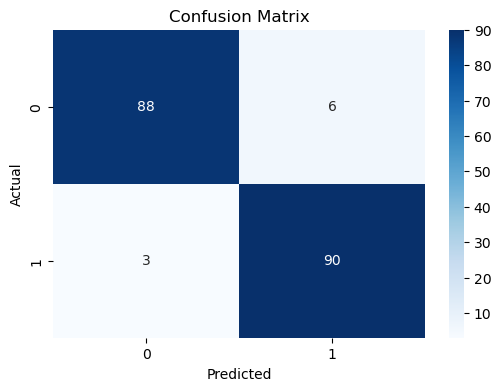

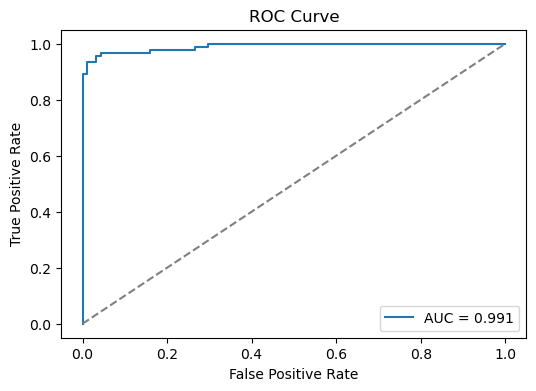

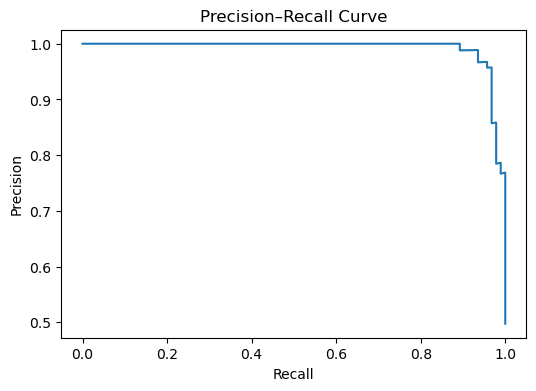


Logistic Regression Coefficients (Feature Influence):
                          Feature  Coefficient
7                 Calories_Burned     3.626993
9           Water_Intake (liters)     1.914266
2                      Height (m)     1.825743
1                     Weight (kg)     1.059635
0                             Age     0.425761
14               Workout_Strength     0.380984
12                            BMI     0.357486
5                     Resting_BPM     0.084657
15                   Workout_Yoga     0.080314
13                   Workout_HIIT     0.021141
10  Workout_Frequency (days/week)    -0.218101
3                         Max_BPM    -0.270044
11               Experience_Level    -1.050898
4                         Avg_BPM    -1.136865
8                  Fat_Percentage    -1.392753
6        Session_Duration (hours)    -3.520522


C:\Users\Admin\AppData\Local\Temp\ipykernel_7220\4274752300.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='viridis')


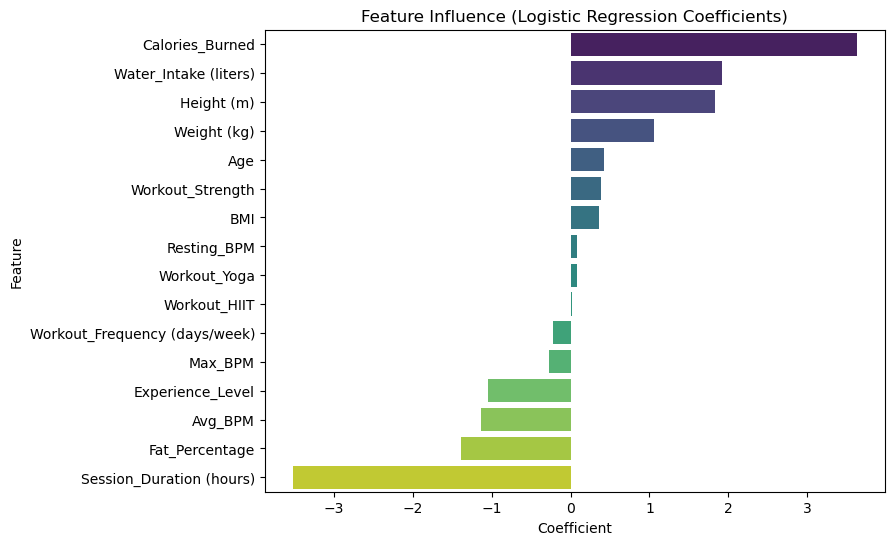

In [20]:
# ============================================================
#   LOGISTIC REGRESSION — FULL MODEL EVALUATION SUITE
#   This cell trains the model and evaluates it using:
#     ✔ Accuracy
#     ✔ Classification Report
#     ✔ Confusion Matrix
#     ✔ ROC Curve + AUC
#     ✔ Precision–Recall Curve
#     ✔ Coefficients (feature influence)
#   Every section includes comments explaining what to look for.
# ============================================================

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve
)
import pandas as pd

# ------------------------------------------------------------
# 1. Train the Logistic Regression model
# ------------------------------------------------------------
# Logistic Regression works best with scaled data.
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]  # needed for ROC/PR curves


# ------------------------------------------------------------
# 2. Accuracy Score
# ------------------------------------------------------------
# Accuracy = proportion of correct predictions.
# Good for balanced datasets. If classes are imbalanced,
# accuracy alone can be misleading.
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy:.4f}")


# ------------------------------------------------------------
# 3. Classification Report
# ------------------------------------------------------------
# Shows precision, recall, and F1-score for each class.
# Precision = how many predicted positives were correct.
# Recall = how many actual positives were found.
# F1 = balance between precision and recall.
# Look for balanced values across both classes.
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


# ------------------------------------------------------------
# 4. Confusion Matrix
# ------------------------------------------------------------
# Shows EXACTLY where the model is making mistakes.
# Diagonal = correct predictions.
# Off-diagonal = errors.
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ------------------------------------------------------------
# 5. ROC Curve + AUC Score
# ------------------------------------------------------------
# ROC curve shows how well the model separates the two classes.
# AUC close to 1.0 = excellent.
# AUC around 0.5 = random guessing.
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# ------------------------------------------------------------
# 6. Precision–Recall Curve
# ------------------------------------------------------------
# Useful when one class is less common.
# Look for curves that stay high (good precision)
# and far right (good recall).
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_lr)

plt.figure(figsize=(6,4))
plt.plot(recall, precision)
plt.title("Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


# ------------------------------------------------------------
# 7. Logistic Regression Coefficients
# ------------------------------------------------------------
# Shows how each feature influences the prediction.
# Positive coefficient = pushes prediction toward class 1.
# Negative coefficient = pushes prediction toward class 0.
# Look for features with large absolute values.
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nLogistic Regression Coefficients (Feature Influence):")
print(coef_df)

plt.figure(figsize=(8,6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='viridis')
plt.title("Feature Influence (Logistic Regression Coefficients)")
plt.show()


TRY 2

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, anderson


#Grab data and put numerical vals in one table
#################################################################################################################
dataset_as_given = pd.read_csv(r"d:\Desktop\Practice Python\21.gym_members_exercise_tracking.csv")
#print(dataset_as_given)

# Get column names
column_names = dataset_as_given.columns
#print(column_names)

desired = ["Age", "Weight (kg)", "Height (m)", "Max_BPM", "Avg_BPM", "Resting_BPM", 
           "Session_Duration (hours)", "Calories_Burned", "Fat_Percentage", "Water_Intake (liters)", "Workout_Frequency (days/week)", "Experience_Level", "BMI"]

dataset_as_given_numeric = dataset_as_given[desired]



#Get Rid of Outliers
#################################################################################################################

# Copy the dataset so you keep the original intact
cleaned_df = dataset_as_given.copy()

# Select numeric columns
numeric_cols = cleaned_df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = cleaned_df[col].quantile(0.25)
    Q3 = cleaned_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]



print("Original rows:", dataset_as_given.shape[0])
print("Cleaned rows:", cleaned_df.shape[0])
print("Rows removed:", dataset_as_given.shape[0] - cleaned_df.shape[0])


#################################################################################################################

encoded_df = cleaned_df.copy()

encoded_df['Gender'] = encoded_df['Gender'].map({
    'Male': 1,
    'Female': 0
})

workout_dummies = pd.get_dummies(encoded_df['Workout_Type'], prefix='Workout', drop_first=True)
encoded_df = pd.concat([encoded_df.drop(columns=['Workout_Type']), workout_dummies], axis=1)


encoded_df.columns

Original rows: 973
Cleaned rows: 931
Rows removed: 42


Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Workout_HIIT', 'Workout_Strength', 'Workout_Yoga'],
      dtype='object')

Dataset already clean and encoded.

In [22]:
#Ensuring no multicolinearity and getting rid of columns that do not have a linear relationship with Gender
import numpy as np
import pandas as pd

# =========================================================
# 1. Track starting number of columns
# =========================================================
start_cols = encoded_df.shape[1]
print(f"Starting with {start_cols} columns.\n")

# =========================================================
# 2. SPEARMAN CORRELATION MATRIX (non-normal data safe)
# =========================================================
spearman_corr = encoded_df.corr(method='spearman')

# =========================================================
# 3. Identify highly correlated pairs (|rho| > 0.8)
# =========================================================
corr_threshold = 0.8

corr_pairs = (
    spearman_corr.where(np.triu(np.ones(spearman_corr.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)

corr_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']
high_corr = corr_pairs[abs(corr_pairs['Correlation']) > corr_threshold]

print("Highly correlated pairs (|rho| > 0.8):")
print(high_corr, "\n")

# Columns to drop due to correlation (drop the second feature in each pair)
to_drop_corr = set(high_corr['Feature_2'])

print(f"Columns removed due to high correlation ({len(to_drop_corr)}):")
print(to_drop_corr, "\n")

# =========================================================
# 4. Check LINEARITY OF LOG-ODDS ASSUMPTION
#    Using Spearman correlation between dependent variable
#    and each predictor (monotonic relationship check)
# =========================================================
target = 'Gender'  # your dependent variable

spearman_with_target = encoded_df.corr(method='spearman')[target].drop(target)

print("Spearman correlations with dependent variable (Gender):")
print(spearman_with_target, "\n")

# Variables with weak monotonic relationship (|rho| < 0.1)
weak_threshold = 0.1
weak_relationships = spearman_with_target[abs(spearman_with_target) < weak_threshold]

to_drop_linear = list(weak_relationships.index)

print(f"Columns removed due to weak monotonic relationship with Gender ({len(to_drop_linear)}):")
print(to_drop_linear, "\n")

# =========================================================
# 5. Combine both sets of columns to drop
# =========================================================
all_to_drop = list(set(to_drop_corr).union(set(to_drop_linear)))

print(f"TOTAL columns removed ({len(all_to_drop)}):")
print(all_to_drop, "\n")

# =========================================================
# 6. Drop columns and show final count
# =========================================================
encoded_df_clean = encoded_df.drop(columns=all_to_drop)

end_cols = encoded_df_clean.shape[1]
print(f"Finished with {end_cols} columns.")
print(f"Removed {start_cols - end_cols} columns in total.\n")

print("Remaining variables:")
print(encoded_df_clean.columns.tolist())


Starting with 17 columns.

Highly correlated pairs (|rho| > 0.8):
                         Feature_1         Feature_2  Correlation
41                     Weight (kg)               BMI     0.818315
91        Session_Duration (hours)   Calories_Burned     0.901281
121  Workout_Frequency (days/week)  Experience_Level     0.835363 

Columns removed due to high correlation (3):
{'Calories_Burned', 'Experience_Level', 'BMI'} 

Spearman correlations with dependent variable (Gender):
Age                              0.033436
Weight (kg)                      0.557463
Height (m)                       0.607013
Max_BPM                          0.010715
Avg_BPM                         -0.009075
Resting_BPM                      0.008901
Session_Duration (hours)        -0.004529
Calories_Burned                  0.139177
Fat_Percentage                  -0.446397
Water_Intake (liters)            0.661282
Workout_Frequency (days/week)   -0.026331
Experience_Level                -0.000878
BMI           

In [23]:
# ============================================================
#   TRAIN/TEST SPLIT + SCALING
#   This prepares your cleaned data for ML models
# ============================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ------------------------------------------------------------
# 1. Define X (features) and y (target)
# ------------------------------------------------------------
# Gender must already be encoded as 0/1 in encoded_df_clean
X = encoded_df_clean.drop(columns=['Gender'])
y = encoded_df_clean['Gender']

# ------------------------------------------------------------
# 2. Train/Test Split
# ------------------------------------------------------------
# test_size=0.2 means 20% of data is held out for testing
# random_state=42 ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------------------------------------
# 3. Scale the numeric features
# ------------------------------------------------------------
# Scaling helps models like Logistic Regression, SVM, KNN, Neural Networks
# Tree-based models (Random Forest, XGBoost) do NOT require scaling,
# but scaling does not harm them.
scaler = StandardScaler()

# Fit on training data ONLY, then transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------------------------------------
# 4. Optional: Print shapes to confirm everything looks right
# ------------------------------------------------------------
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("\nScaled versions created: X_train_scaled, X_test_scaled")


X_train shape: (744, 4)
X_test shape: (187, 4)
y_train shape: (744,)
y_test shape: (187,)

Scaled versions created: X_train_scaled, X_test_scaled


In [24]:
# ============================================================
# LOGISTIC REGRESSION
# Good baseline model. Interpretable. Works well with scaling.
# ============================================================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ------------------------------------------------------------
# 1. Create and fit the model
# ------------------------------------------------------------
# Using scaled features: X_train_scaled, X_test_scaled
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# ------------------------------------------------------------
# 2. Predict on the test set
# ------------------------------------------------------------
y_pred_lr = log_reg.predict(X_test_scaled)

# ------------------------------------------------------------
# 3. Evaluate accuracy
# ------------------------------------------------------------
accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.9037433155080213


Accuracy: 0.9037

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        94
           1       0.86      0.96      0.91        93

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



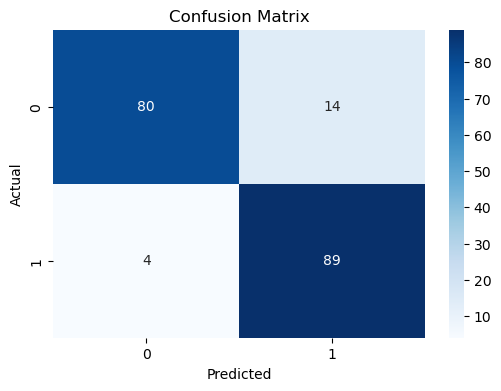

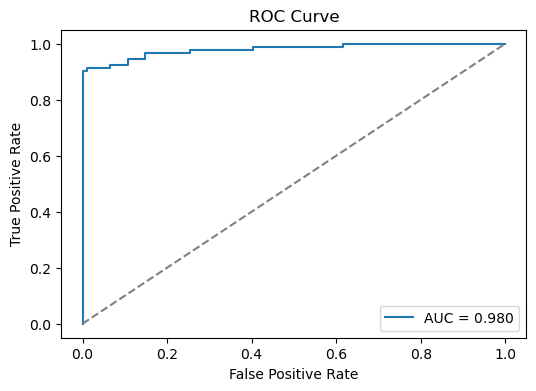

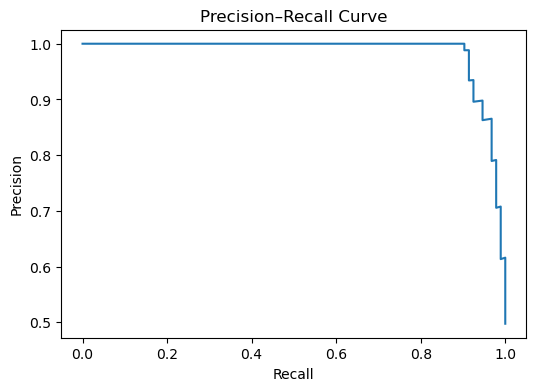


Logistic Regression Coefficients (Feature Influence):
                 Feature  Coefficient
3  Water_Intake (liters)     1.989010
1             Height (m)     1.702852
0            Weight (kg)     1.337670
2         Fat_Percentage    -0.262865


C:\Users\Admin\AppData\Local\Temp\ipykernel_7220\17581942.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='viridis')


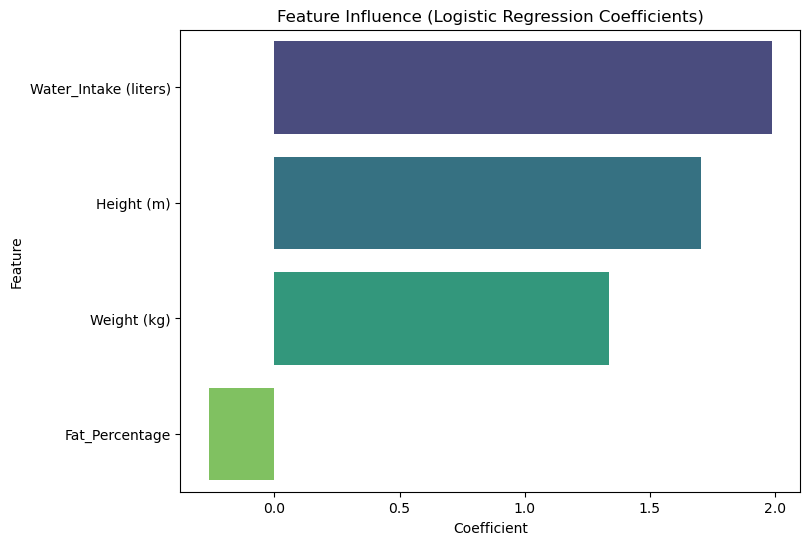

In [25]:
# ============================================================
#   LOGISTIC REGRESSION — FULL MODEL EVALUATION SUITE
#   Using your final cleaned dataset + scaled features
#   Includes:
#     ✔ Accuracy
#     ✔ Classification Report
#     ✔ Confusion Matrix
#     ✔ ROC Curve + AUC
#     ✔ Precision–Recall Curve
#     ✔ Coefficients (feature influence)
# ============================================================

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve
)
import pandas as pd

# ------------------------------------------------------------
# 1. Train the Logistic Regression model
# ------------------------------------------------------------
# Logistic Regression works best with scaled data.
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]  # needed for ROC/PR curves


# ------------------------------------------------------------
# 2. Accuracy Score
# ------------------------------------------------------------
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy:.4f}")


# ------------------------------------------------------------
# 3. Classification Report
# ------------------------------------------------------------
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


# ------------------------------------------------------------
# 4. Confusion Matrix
# ------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ------------------------------------------------------------
# 5. ROC Curve + AUC Score
# ------------------------------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# ------------------------------------------------------------
# 6. Precision–Recall Curve
# ------------------------------------------------------------
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_lr)

plt.figure(figsize=(6,4))
plt.plot(recall, precision)
plt.title("Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


# ------------------------------------------------------------
# 7. Logistic Regression Coefficients
# ------------------------------------------------------------
# Shows how each feature influences the prediction.
coef_df = pd.DataFrame({
    'Feature': X.columns,   # X comes from encoded_df_clean.drop('Gender')
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nLogistic Regression Coefficients (Feature Influence):")
print(coef_df)

plt.figure(figsize=(8,6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='viridis')
plt.title("Feature Influence (Logistic Regression Coefficients)")
plt.show()


When looking at the accuracy of the first model (let's call it Model 1) compared to the accuracy of the second model (let's call that one Model 2) -> we can observe that the model that did not have data that satisfied all of the assumtions of Logistic Regression has a better accuracy then the the model that did satisfy all of the assumptions of Logistic Regression.<br>
Model 1 -> does not satisfy the all of the Assumptions of Logistic Regression<br>
Model 2 -> Satisfies all of the Assumtions of Logistic Regressiom<br><br>

Comparison<br><br>

Accuracy <br>
Model 1 -> 95%<br>
Model 2 -> 90%<br><br>

Precision <br>
Model 1 Class 0 -> 97%<br>
Model 2 Class 0 -> 95%<br>
Model 1 Class 1 -> 94%<br>
Model 2 Class 1 -> 86%<br><br>

Model 1 beats Model 2 in terms of Accuracy, Precision, Recall, and F1-Score. In this case it is very likely that by removing all of the data required to make the dataset satisfy all of the assuptions of Logistic Regression - the model was left with such a small amount of data that it did not have enough to go on to be able to make better predictions. <br>
The trade off is not worth it in this case with the amount of data provided. If more data could be added overtime to ensure that enough data was there to improve the model then satisfiying all of the assumptions would be possible without such as tradeoff.<br>


